In [1]:
import sys
import os
import glob
from mpi4py import MPI
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'
plt.style.use('JFM')

import scripts.statistics as stats
import scripts.get_namelist as nml
from scripts.common import *
    

# Nicer Rij profiles

def plot_Rij(directory,inp,flist_plot,istat=0,savename=''):
    fig,ax = plt.subplots(1,3,figsize=(9,3), dpi=200)

    if len(flist_plot)>=15: flist_plot = flist_plot[::2]
        
    Rij_center = np.zeros([3,len(flist_plot)])
    counter = 0

    for fname in flist_plot:
        tID = fname.split('_')[-1]
        tID = int(tID.split('.dat')[0])
        time = nml.read_time(directory,tID)

        # Get dtheta
        idx = np.argmin(abs(tlist-time))
        dtheta = dlist[idx]
        yplot = y/dtheta

        # Get Rij
        dat = np.fromfile(fname,dtype=float, count=-1, sep=' ')
        n = np.size(dat)
        nstats=6
        dat = np.reshape(dat,[n/nstats,nstats])
        dat = np.flipud(dat)
        R11 = dat[:,0]
        R12 = dat[:,1]
        R22 = dat[:,3]
        R11 = np.sqrt(R11)/inp.du
        R22 = np.sqrt(R22)/inp.du
        R12 = np.sqrt(abs(R12))/inp.du

        if (counter==0 or counter==len(flist_plot)-1):
            lbl = r't=%d ($\delta_{\theta}$=%0.2f)'%(time,dtheta)
        else: 
            lbl = 't=%d'%time
        ax[0].plot(yplot,R11,alpha=0.5,label=lbl)
        ax[1].plot(yplot,R22,alpha=0.5,label=lbl)
        ax[2].plot(yplot,abs(R12),alpha=0.5,label=lbl)

        # Get centerline stats
        Rij_center[0,counter] = np.amax(R11)
        Rij_center[1,counter] = np.amax(R22)
        Rij_center[2,counter] = np.amax(abs(R12))
        counter += 1


    ax[0].set_title(r'$R_{11}/\Delta \bar{u}^2$')
    ax[1].set_title(r'$R_{22}/\Delta \bar{u}^2$')
    ax[2].set_title(r'$|R_{12}|/\Delta \bar{u}^2$')
    ax[1].set_xlabel(r'$\eta = y/\delta_\theta$')
    ax[1].set_yticklabels([''])
    ax[2].set_yticklabels([''])
    for a in ax:
        a.set_xlim([-20,20])
        a.set_ylim([0,0.2])
        a.grid(True)
    plt.subplots_adjust(hspace = 0.5)
    ax[2].legend(bbox_to_anchor=(0.55,0.25))

    # set the overall title and save
    # fig.suptitle('Time: {}'.format(np.around(reader.time,-1)),size=fs,y=0.95)
    if savename:
        fig.savefig(savename, dpi=300,bbox_inches='tight')
        plt.close(fig)
        print "Saved plot to ",savename
    else: 
        print("'R11': \t[{},{}],".format(np.mean(Rij_center[0,istat:]),np.std(Rij_center[0,istat:])))
        print("'R22': \t[{},{}],".format(np.mean(Rij_center[1,istat:]),np.std(Rij_center[1,istat:])))
        print("'R12': \t[{},{}],".format(np.mean(Rij_center[2,istat:]),np.std(Rij_center[2,istat:])))
        fig.show()


Params for this run:
	Mc = 2.0
	Re = 1000.0
	rr = 1.0
Params for this grid:
	N = 1024x1448x512
	L = 80.0x80.0x40.0
['kinematic_Rij_0000.dat', 'kinematic_Rij_0001.dat', 'kinematic_Rij_0002.dat', 'kinematic_Rij_0003.dat', 'kinematic_Rij_0004.dat', 'kinematic_Rij_0005.dat', 'kinematic_Rij_0006.dat', 'kinematic_Rij_0007.dat', 'kinematic_Rij_0008.dat', 'kinematic_Rij_0009.dat', 'kinematic_Rij_0010.dat', 'kinematic_Rij_0011.dat', 'kinematic_Rij_0012.dat', 'kinematic_Rij_0013.dat']
/home/kmatsuno/ShearLayerData/production/Mc20/rr1/1024x1448x512/
'R11': 	[0.136969588605,0.00695250825346],
'R22': 	[0.0785355699627,0.00222739636677],
'R12': 	[0.0677922255004,0.00313488085519],


/gpfs/mira-home/kmatsuno/floatpy_env/lib/python2.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


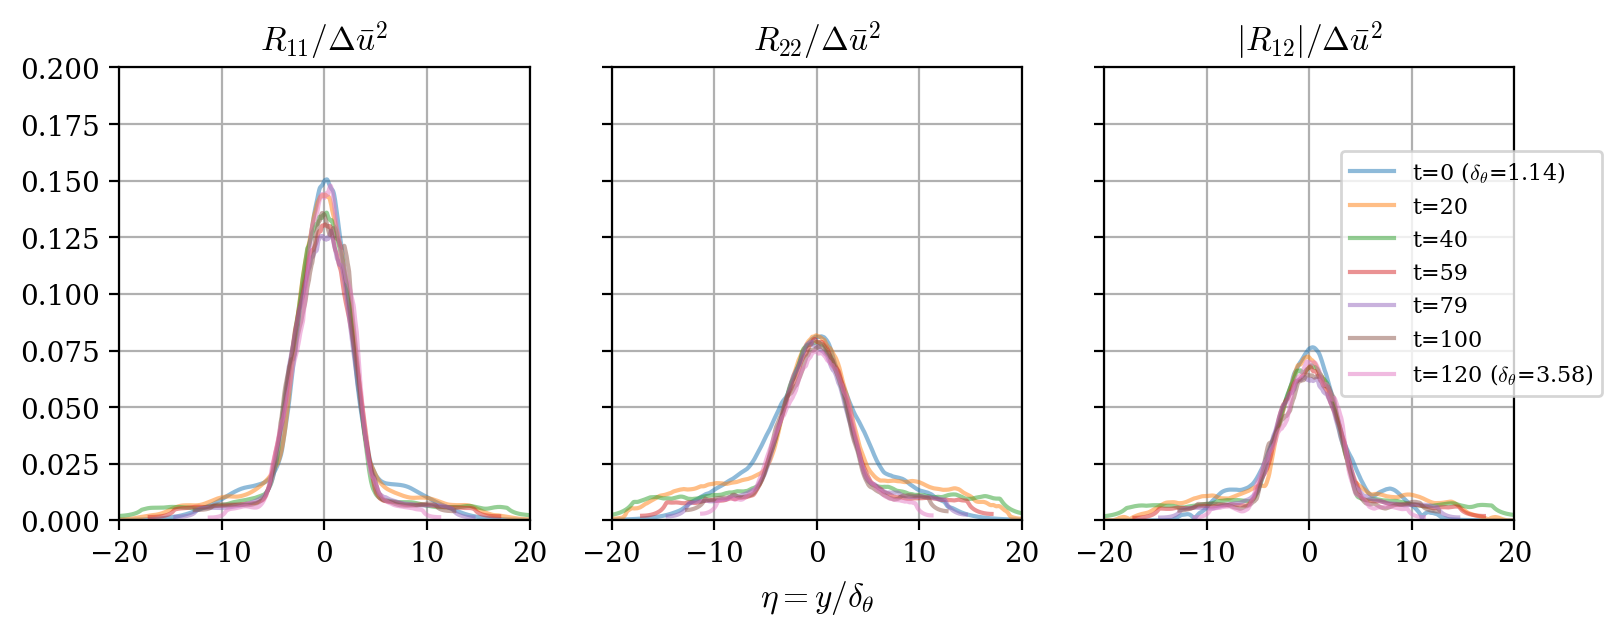

In [2]:
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/1024x1448x512/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/1024x1448x512/'
directory = '/home/kmatsuno/ShearLayerData/production/Mc20/rr1/1024x1448x512/'

inp = nml.inputs(directory,verbose=True)
Nx,Ny,Nz,Lx,Ly,Lz = nml.read_grid_params(directory,verbose=True)
Ny = int(Ny)
y = np.linspace(-Ly/2.,Ly/2.,Ny)

flist = glob.glob(directory+"kinematic_Rij*")
flist.sort()
print([f.split('/')[-1] for f in flist])

# And read growth rates
tlist,dlist,rates = growth_rates(directory+'shearlayer_')

print(directory)
plot_Rij(directory,inp,flist[::2],istat=1,savename='')

Mc02={
'R11': 	[nan,nan],
'R22': 	[nan,nan],
'R12': 	[nan,nan],
}
Mc04={
'R11': 	[nan,nan],
'R22': 	[nan,nan],
'R12': 	[nan,nan],
}
Mc08={
'R11': 	[nan,nan],
'R22': 	[nan,nan],
'R12': 	[nan,nan],
}
Mc12={


/gpfs/mira-home/kmatsuno/floatpy_env/lib/python2.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/gpfs/mira-home/kmatsuno/floatpy_env/lib/python2.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/gpfs/mira-home/kmatsuno/floatpy_env/lib/python2.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/gpfs/mira-home/kmatsuno/floatpy_env/lib/python2.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/gpfs/mira-home/kmatsuno/floatpy_env/lib/python2.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


'R11': 	[nan,nan],
'R22': 	[nan,nan],
'R12': 	[nan,nan],
}
Mc16={
'R11': 	[nan,nan],
'R22': 	[nan,nan],
'R12': 	[nan,nan],
}
Mc20={
'R11': 	[nan,nan],
'R22': 	[nan,nan],
'R12': 	[nan,nan],
}
Done


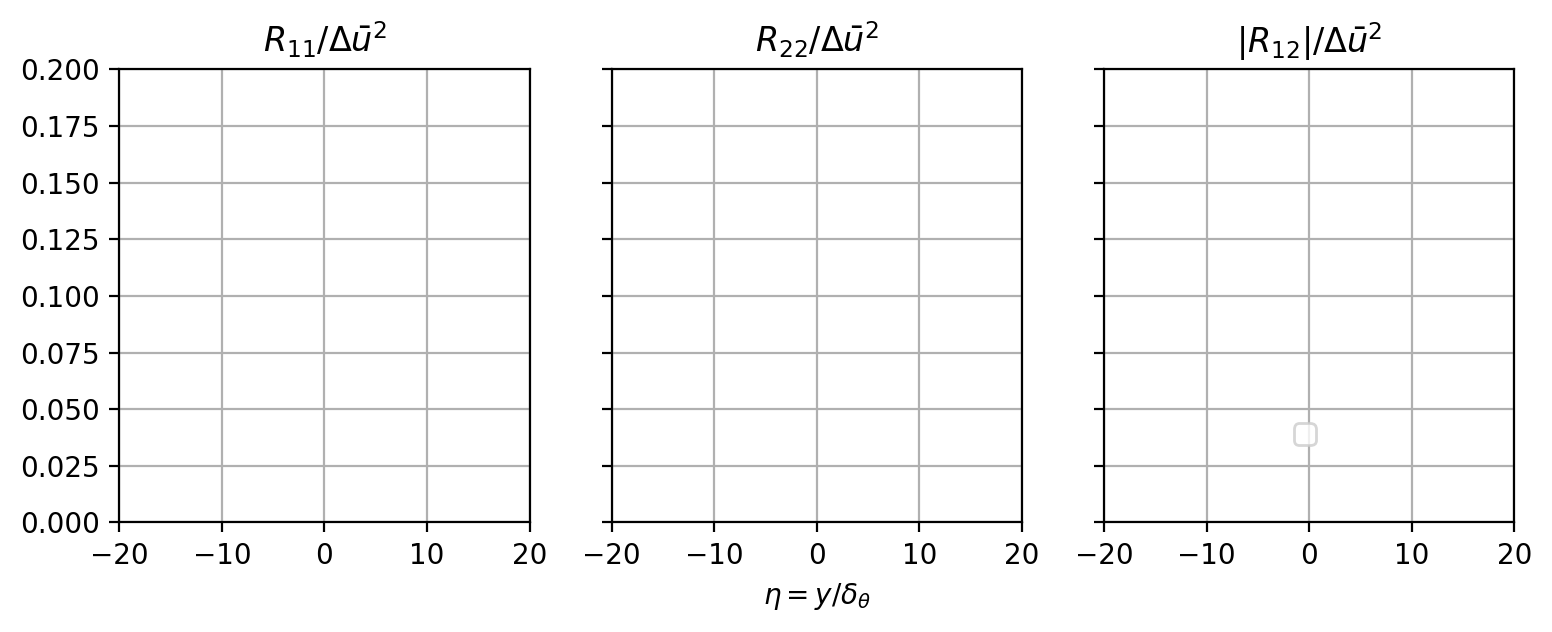

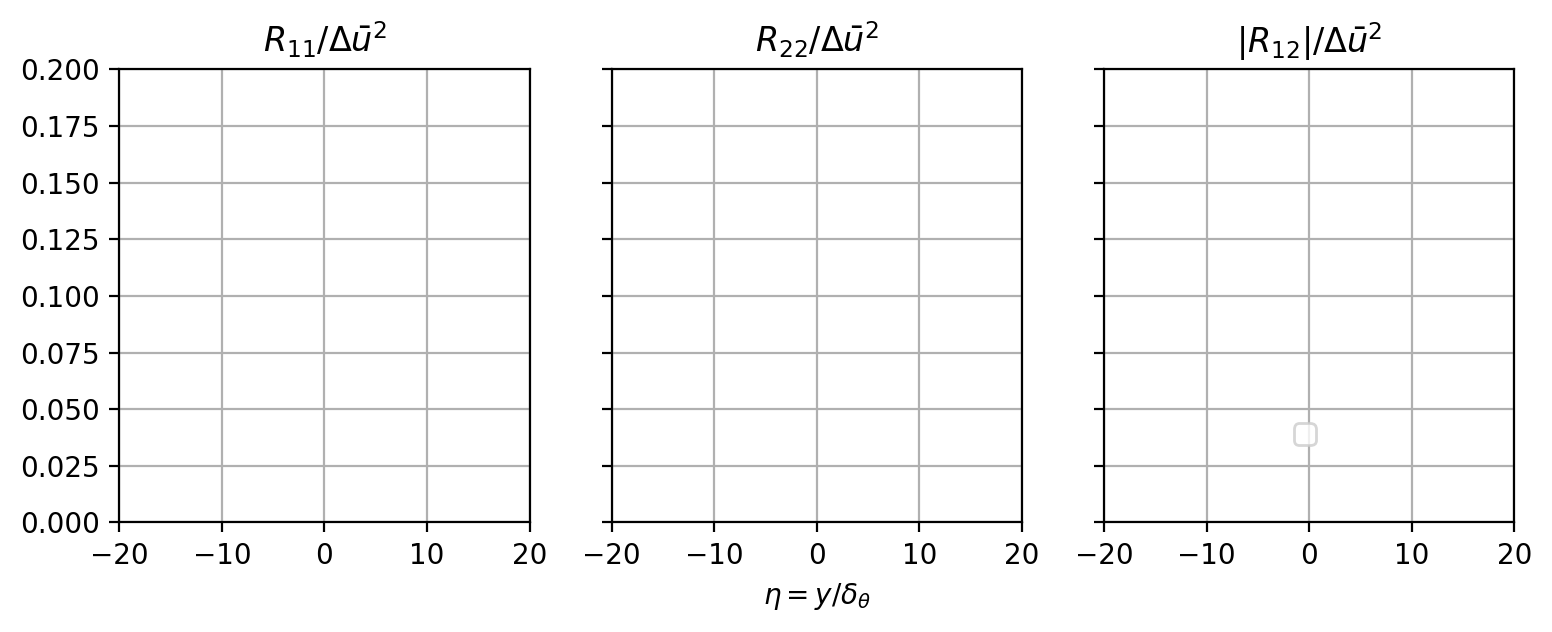

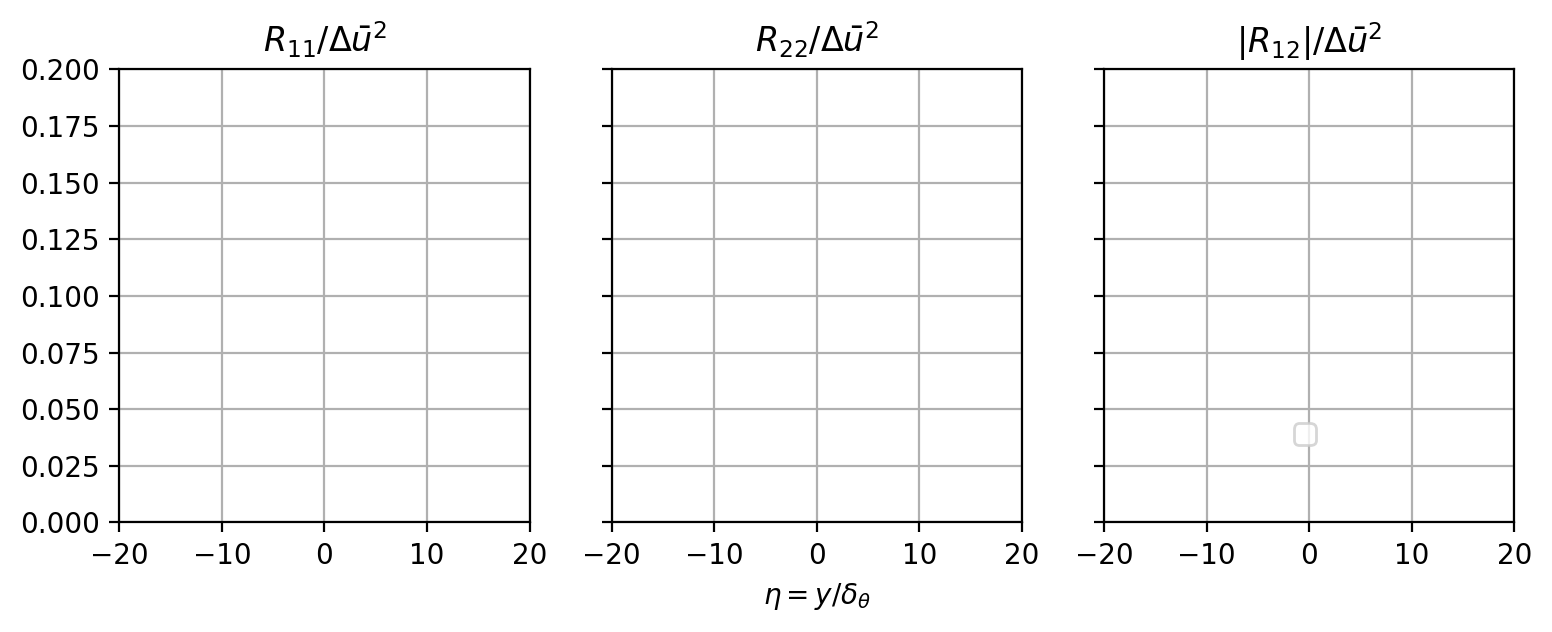

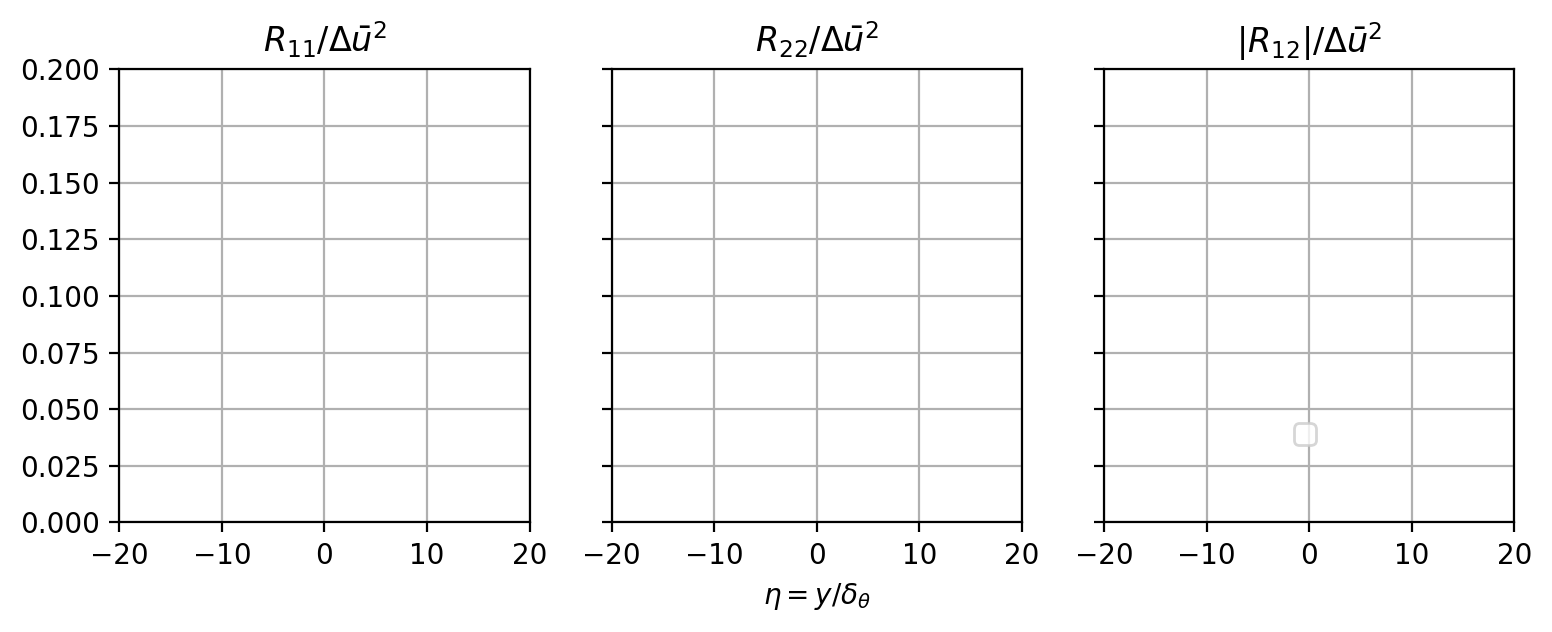

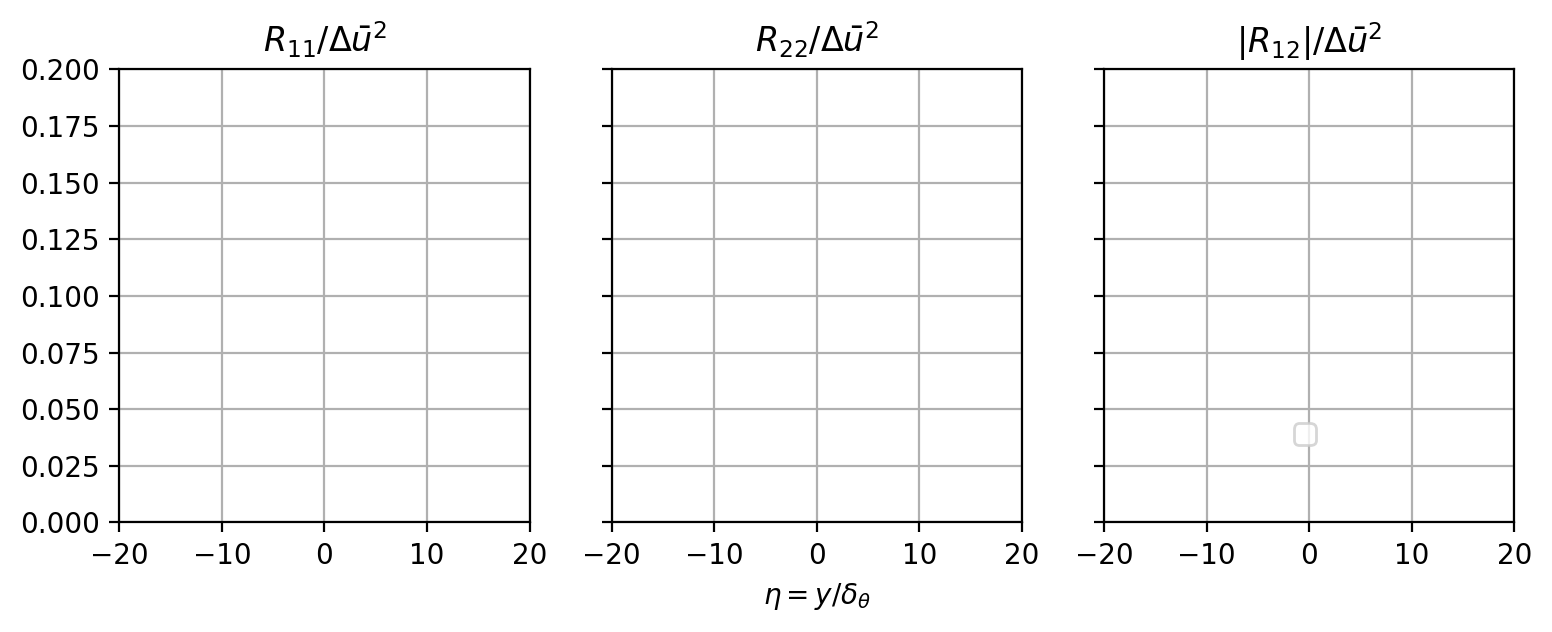

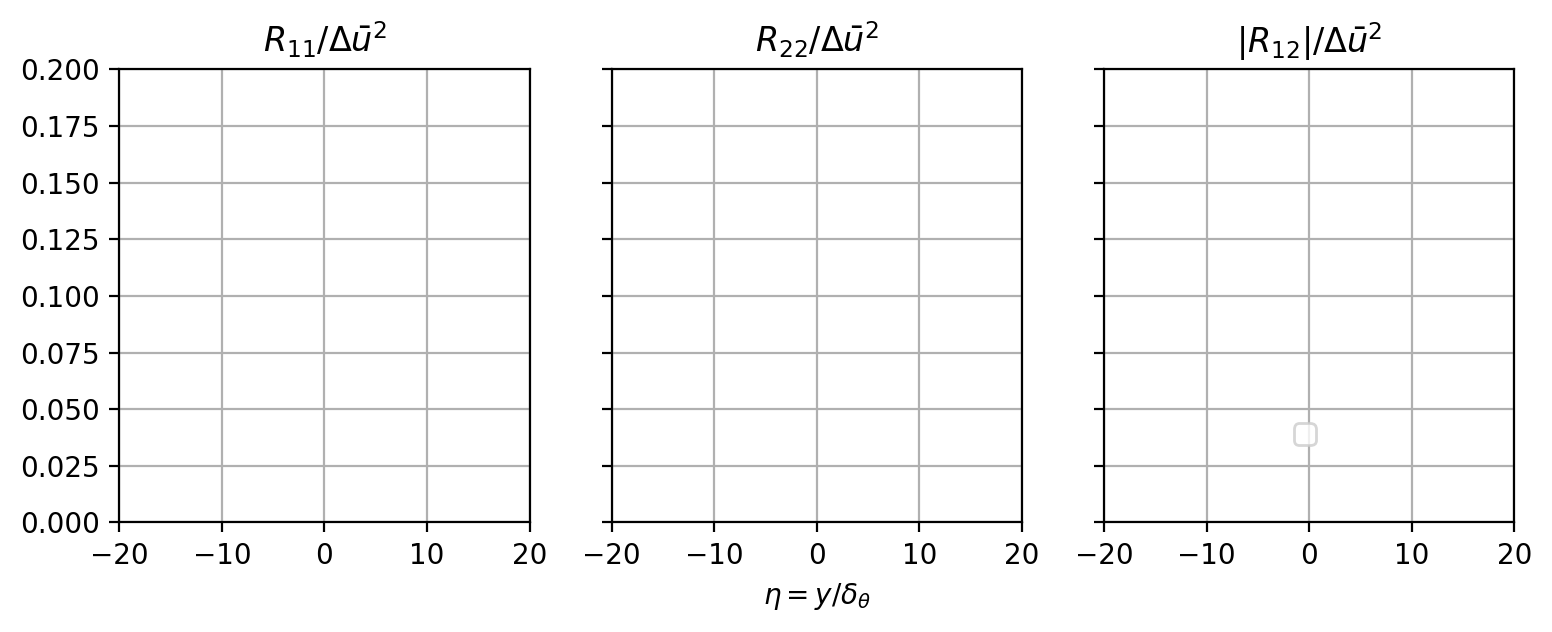

In [92]:
s = '1'

if s=='1': Mc_list = ['02','04','08','12','16','20']
else: Mc_list = ['02','08','20']

for Mc in Mc_list:
    directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc%s/rr%s/1024x1448x512/'%(Mc,s)
    inp = nml.inputs(directory,verbose=False)
    Nx,Ny,Nz,Lx,Ly,Lz = nml.read_grid_params(directory,verbose=False)
    Ny = int(Ny)
    y = np.linspace(-Ly/2.,Ly/2.,Ny)

    flist = glob.glob(directory+"kinematic_Rij*")
    flist.sort()

    tlist,dlist,rates = growth_rates(directory+'shearlayer_')

    # Plot Rij
    print('Mc'+Mc+'={')
    plot_Rij(directory,inp,flist,istat=3)#,savename=directory+'/img/Rij.png')
    print('}')

print('Done')

In [3]:
# s=1
# momentum stresses u"u"
Mc02={
'R11': [0.174974933098,0.00369592906184],
'R22': 	[0.124014025833,0.00297560198323],
'R12': 	[0.0985705454736,0.00440648758949],
}
Mc04={
'R11': 	[0.154287180501,0.00583177883447],
'R22': 	[0.110338066969,0.00298332442465],
'R12': 	[0.0909365396341,0.00403246466156],
}
Mc08={
'R11': 	[0.145395958909,0.00325576918252],
'R22': 	[0.0958107992233,0.0036120585184],
'R12': 	[0.0787407396865,0.00295607346555],
}
Mc12={
'R11': 	[0.138705919735,0.00310157486397],
'R22': 	[0.0826836836729,0.00385739080133],
'R12': 	[0.070096244005,0.00258641239218],
}
Mc16={
'R11': 	[0.122226270634,0.00781707732059],
'R22': 	[0.0731582948589,0.00334596628135],
'R12': 	[0.0625890891217,0.0039079887614],
}
Mc20={
'R11': 	[0.11211311532,0.00525237729044],
'R22': 	[0.0635690057198,0.00197394593209],
'R12': 	[0.054827499509,0.00213021612735],
}
# kinematic stresses: u'u'
def sort_dict(dlist,keylist):
    dR11,dR22,dR12 = {},{},{}
    for d,key in zip(dlist,keylist):
        dR11[key] = d['R11']
        dR22[key] = d['R22']
        dR12[key] = d['R12']
    return dR11,dR22,dR12
Rij = {}
Rij[0],Rij[1],Rij[2] = sort_dict([Mc02,Mc04,Mc08,Mc12,Mc16,Mc20],
    [0.2,0.4,0.8,1.2,1.6,2.0])

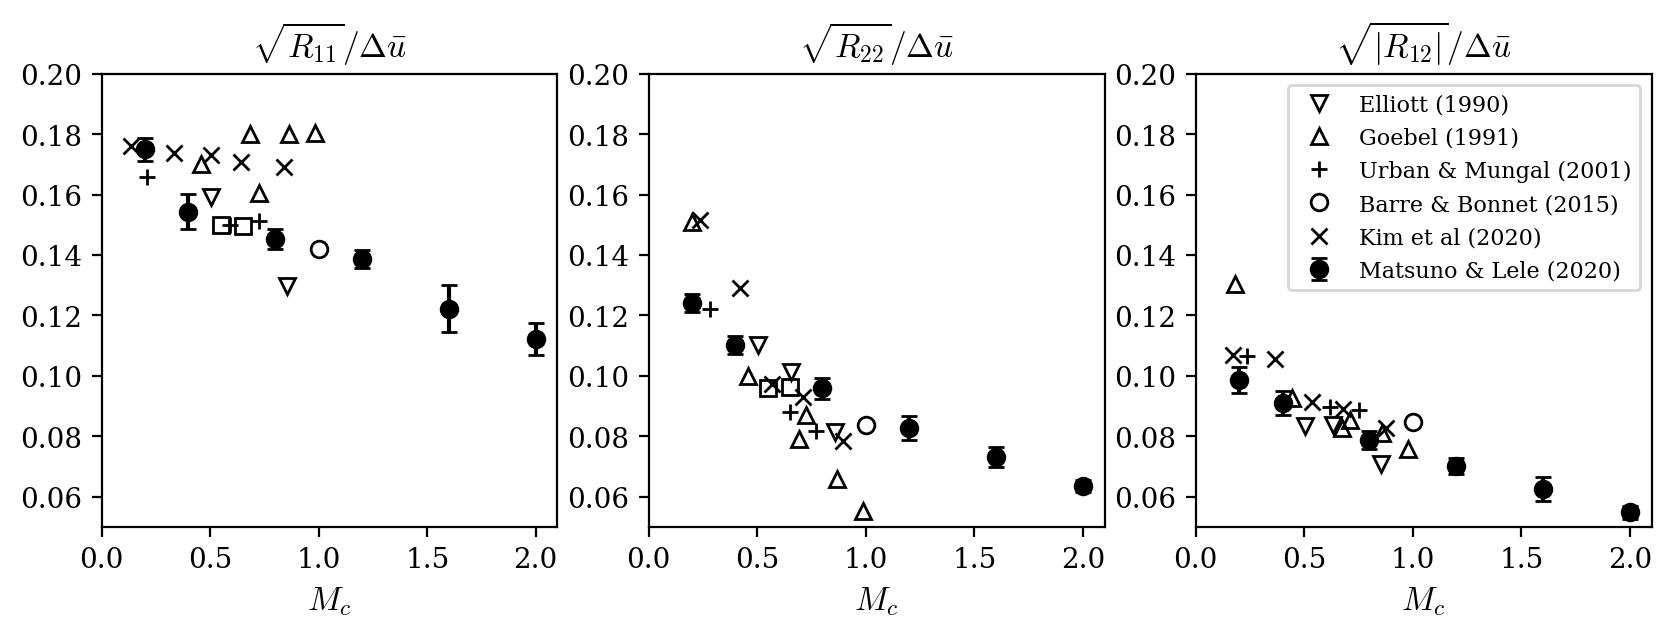

In [4]:
# Compare to lit
# marker list :+v^sP*xD

def plot_lit():
    #######
    # R11 #
    #######
    #ax[0].plot(0,0.17814902655789827,'k+',label='Wyganski (1970)')
    dat = {
        0.503867705699914: 0.159159738330423,
        0.853478068232166: 0.12979019520967444,}
    ax[0].plot(dat.keys(),dat.values(),'kv',label='Elliot (1990)',fillstyle='none')
    dat = {
        0.4560009382574475: 0.17012275534937055,
        0.6827152128020016: 0.1800078188120618,
        0.7235685058250151: 0.16039302561964083,
        0.8646355130443847: 0.1798973129349214,
        0.9847793791863223: 0.18027991347181316}
    ax[0].plot(dat.keys(),dat.values(),'k^',label='Goebel (1991)',fillstyle='none')
    dat = {
        0.5483332898954886: 0.15002111079256691,
        0.6512992259376061: 0.1495029841799369}
    ax[0].plot(dat.keys(),dat.values(),'ks',label='Debisschop (1993)',fillstyle='none')
    dat = {
        0.20736782370188223: 0.8880733944954131,
        0.593516504303414: 0.7266055045871562,
        0.7270405750496544: 0.7376146788990829}
    for key in dat.keys(): dat[key] = (dat[key]*0.031)**0.5
    ax[0].plot(dat.keys(),dat.values(),'k+',label='Urban & Mungal (2001)')
    dat = {1.0: 0.65}
    for key in dat.keys(): dat[key] = (dat[key]*0.031)**0.5
    ax[0].plot(dat.keys(),dat.values(),'ko',label='Barre & Bonnet (2015)',fillstyle='none')
    dat = { 
        0.13780383996973433: 1.0018348623853,
        0.33500425612408957: 0.9724770642201837,#*(314.89-64.75)**2,
        0.5028610611936063: 0.9651376146788992,#*(434.76-97.28)**2,
        0.6431949304833066: 0.9394495412844039,#*(509.24-92.57)**2,
        0.84247611841483: 0.9211009174311928}#*(564.16-59.76)**2,}
    for key in dat.keys(): dat[key] = (dat[key]*0.031)**0.5
    ax[0].plot(dat.keys(),dat.values(),'kx',label='Kim et al (2020)',fillstyle='none')
    
    #######
    # R22 #
    #######
    #ax[1].plot(0,0.1392438644751397,'k+',label='Wyganski (1970)')
    dat = {
        0.5051198715626866: 0.11012520680169548,
        0.6539803819835341: 0.10130003622088865,
        0.85894900686239: 0.08140497890377965,}
    ax[1].plot(dat.keys(),dat.values(),'kv',label='Elliott (1990)',fillstyle='none')
    dat = {
        0.20115808949496328: 0.15083356991120983,
        0.4585931611046392: 0.0999118951356325,
        0.6933485722117257: 0.07913872600366123,
        0.7265934743663793: 0.0871308161447269,
        0.8686258577987489: 0.06588677545985841,
        0.987655529559182: 0.05527894979001671,}
    ax[1].plot(dat.keys(),dat.values(),'k^',label='Goebel (1991)',fillstyle='none')
    dat = {
        0.5483332898954886: 0.0959481551820344,
        0.6512992259376061: 0.09642294250668124}
    ax[1].plot(dat.keys(),dat.values(),'ks',label='Debisschop (1993)',fillstyle='none')
    dat = {
        0.28467282886835: 0.8276985743380854,
        0.649522168259439: 0.43014256619144575,
        0.772625202360437: 0.371486761710794}
    for key in dat.keys(): dat[key] = (dat[key]*0.018)**0.5
    ax[1].plot(dat.keys(),dat.values(),'k+',label='Urban & Mungal (2001)')
    dat = {1.0: 0.39}
    for key in dat.keys(): dat[key] = (dat[key]*0.018)**0.5
    ax[1].plot(dat.keys(),dat.values(),'ko',label='Barre & Bonnet (2015)',fillstyle='none')
    dat = {
        0.23732309781189898: 1.2741344195519346,
        0.4196720455376277: 0.9254582484725049,
        0.5664316674499981: 0.5246435845213848,
        0.7106115201838223: 0.47902240325865586,
        0.8969972322314472: 0.342158859470468}
    for key in dat.keys(): dat[key] = (dat[key]*0.018)**0.5
    ax[1].plot(dat.keys(),dat.values(),'kx',label='Kim et al (2020)',fillstyle='none')

    #######
    # R12 #
    #######
    dat = {
        0.5021475946213474: 0.6341495888682649,
        0.6306834946996929: 0.6354263720258901,
        0.8535289594595183: 0.4559278698913773}
    for key in dat.keys(): dat[key] = (dat[key]*0.011)**0.5
    ax[2].plot(dat.keys(),dat.values(),'kv',label='Elliott (1990)',fillstyle='none')
    dat = {
        0.179347044023146: 1.5461076573558203,
        0.4448333452038508: 0.7787074896181423,
        0.6754930019666299: 0.6232422791974752,
        0.7115289856231077: 0.6626458075028452,
        0.8571758731007779: 0.5951204905963696,
        0.9785516709085598: 0.5208042687349468}
    for key in dat.keys(): dat[key] = (dat[key]*0.011)**0.5
    ax[2].plot(dat.keys(),dat.values(),'k^',label='Goebel (1991)',fillstyle='none')
    dat = {
        0.2345609386333012: 1.033780391552649,
        0.6186148123707265: 0.7334270377438845,
        0.7500970233103046: 0.7157892900800749}
    for key in dat.keys(): dat[key] = (dat[key]*0.011)**0.5
    ax[2].plot(dat.keys(),dat.values(),'k+',label='Urban & Mungal (2001)')
    dat = {1.0: 0.65}
    for key in dat.keys(): dat[key] = (dat[key]*0.011)**0.5
    ax[2].plot(dat.keys(),dat.values(),'ko',label='Barre & Bonnet (2015)',fillstyle='none')
    dat = {
        0.17222473360378726: 1.0408689800124713,
        0.36741819154363714: 1.0144193354739024,
        0.5357401897441636: 0.7594906239870691,
        0.6783317514052027: 0.7194731234528959,
        0.8744191319793191: 0.6225585373972169}
    for key in dat.keys(): dat[key] = (dat[key]*0.011)**0.5
    ax[2].plot(dat.keys(),dat.values(),'kx',label='Kim et al (2020)',fillstyle='none')
    
    
fig,ax = plt.subplots(1,3,figsize=(10,3),dpi=200)
plot_lit()
for i in range(3):
    ax[i].errorbar(Rij[i].keys(),[x[0] for x in Rij[i].values()],
        yerr=[x[1] for x in Rij[i].values()],fmt='ko',capsize=3,label='Matsuno & Lele (2020)')
    ax[i].set_xlim([0,2.1])
    ax[i].set_ylim([0.05,0.2])


ax[0].set_title(r'$\sqrt{R_{11}}/\Delta \bar{u}$')
ax[0].set_xlabel('$M_c$')

ax[1].set_title(r'$\sqrt{R_{22}}/\Delta \bar{u}$')
ax[1].set_xlabel('$M_c$')

ax[2].set_title(r'$\sqrt{|R_{12}|}/\Delta \bar{u}$')
ax[2].set_xlabel('$M_c$')
ax[2].legend(fontsize=8)


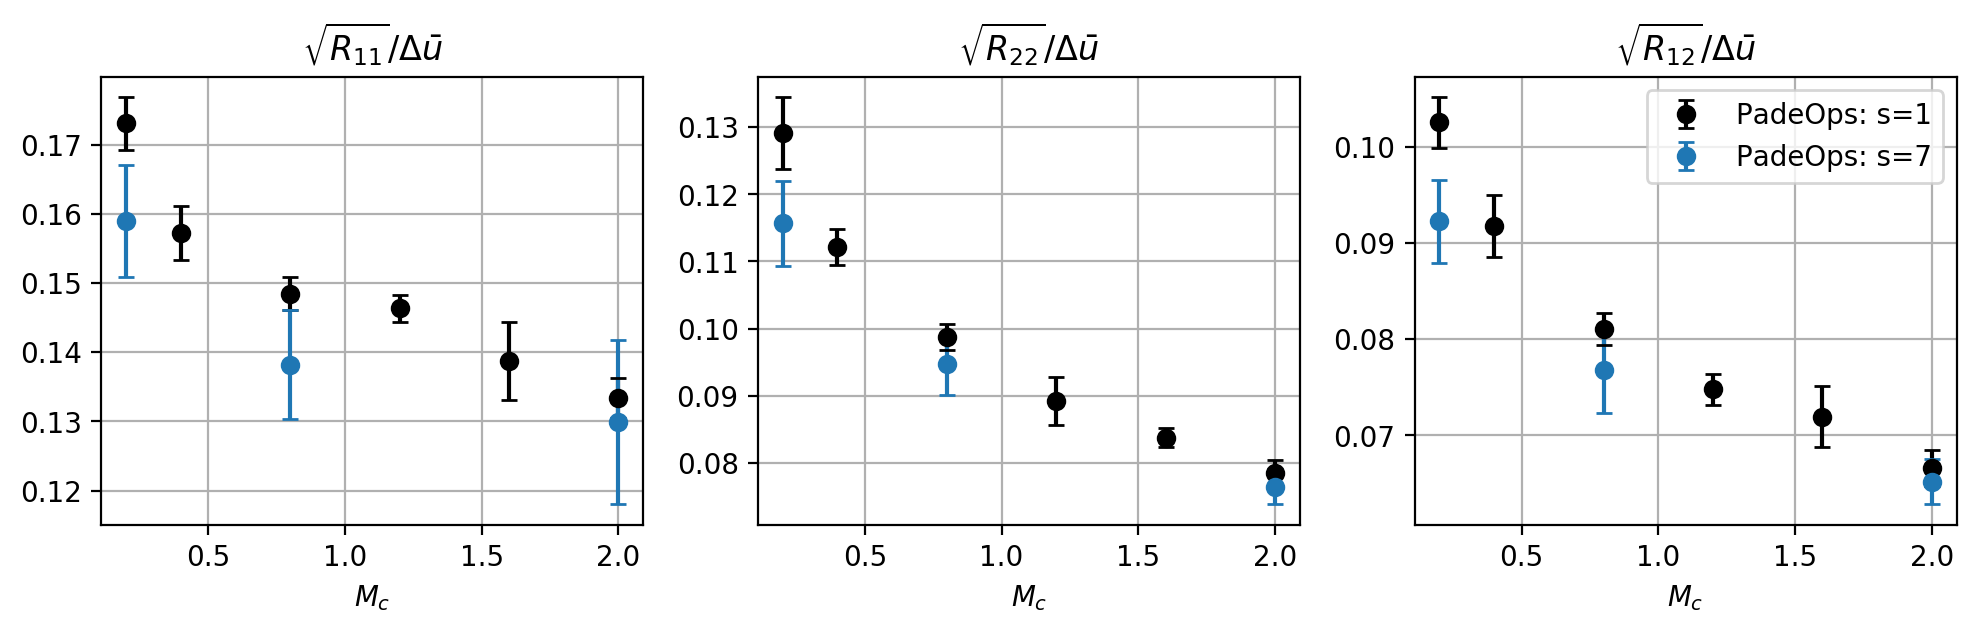

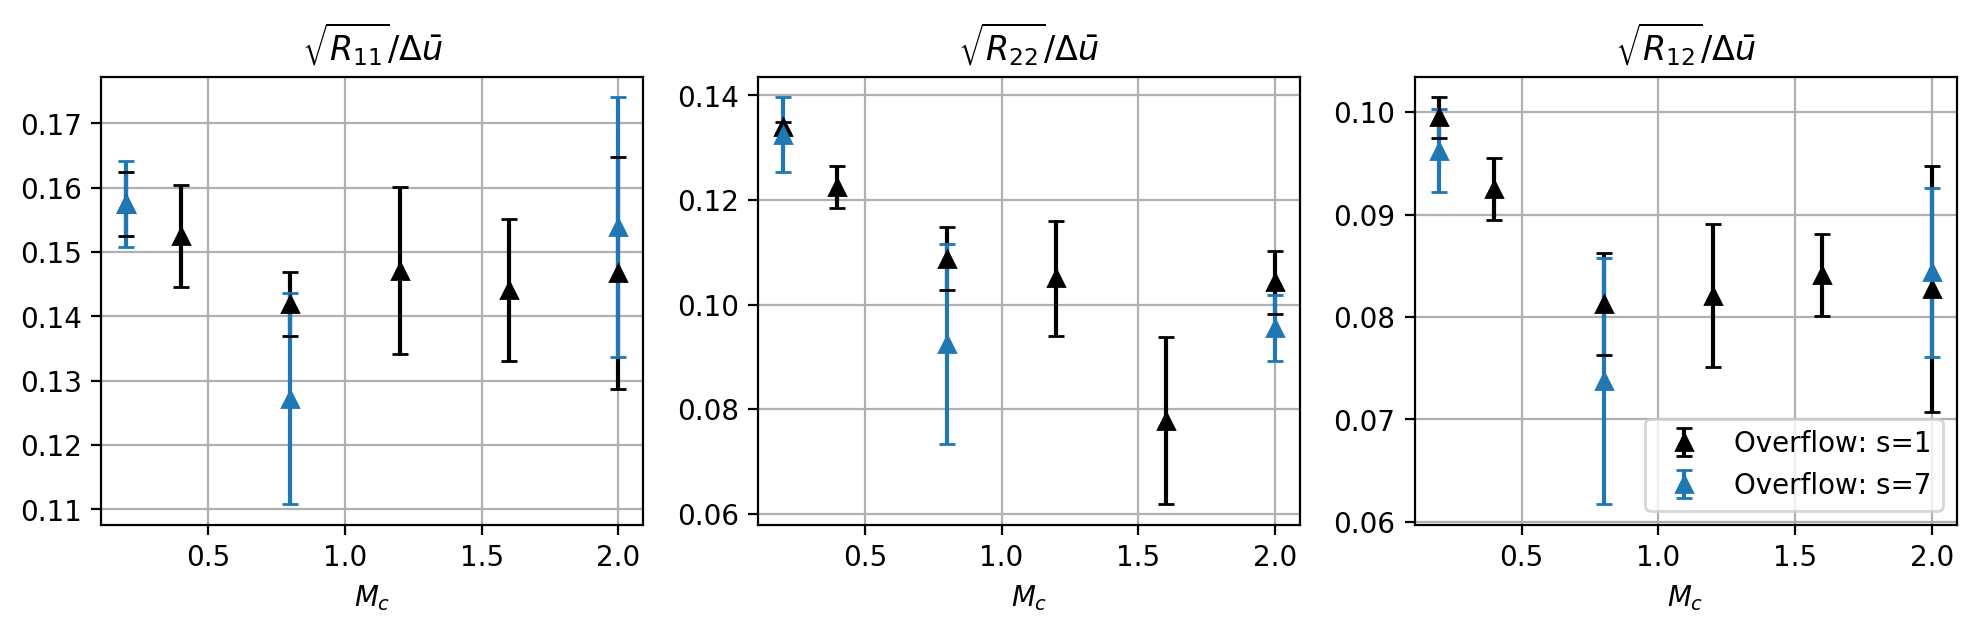

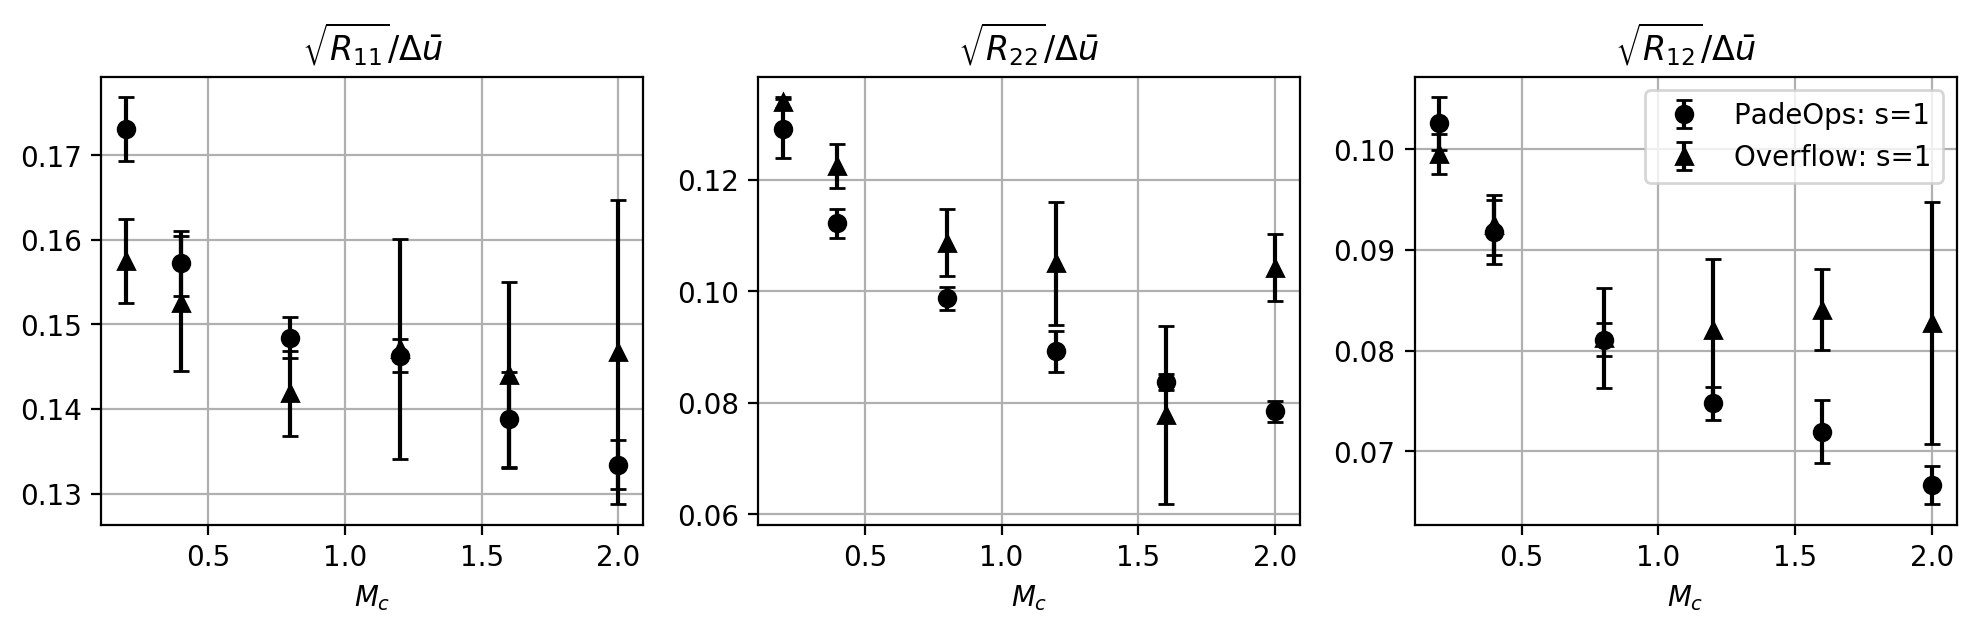

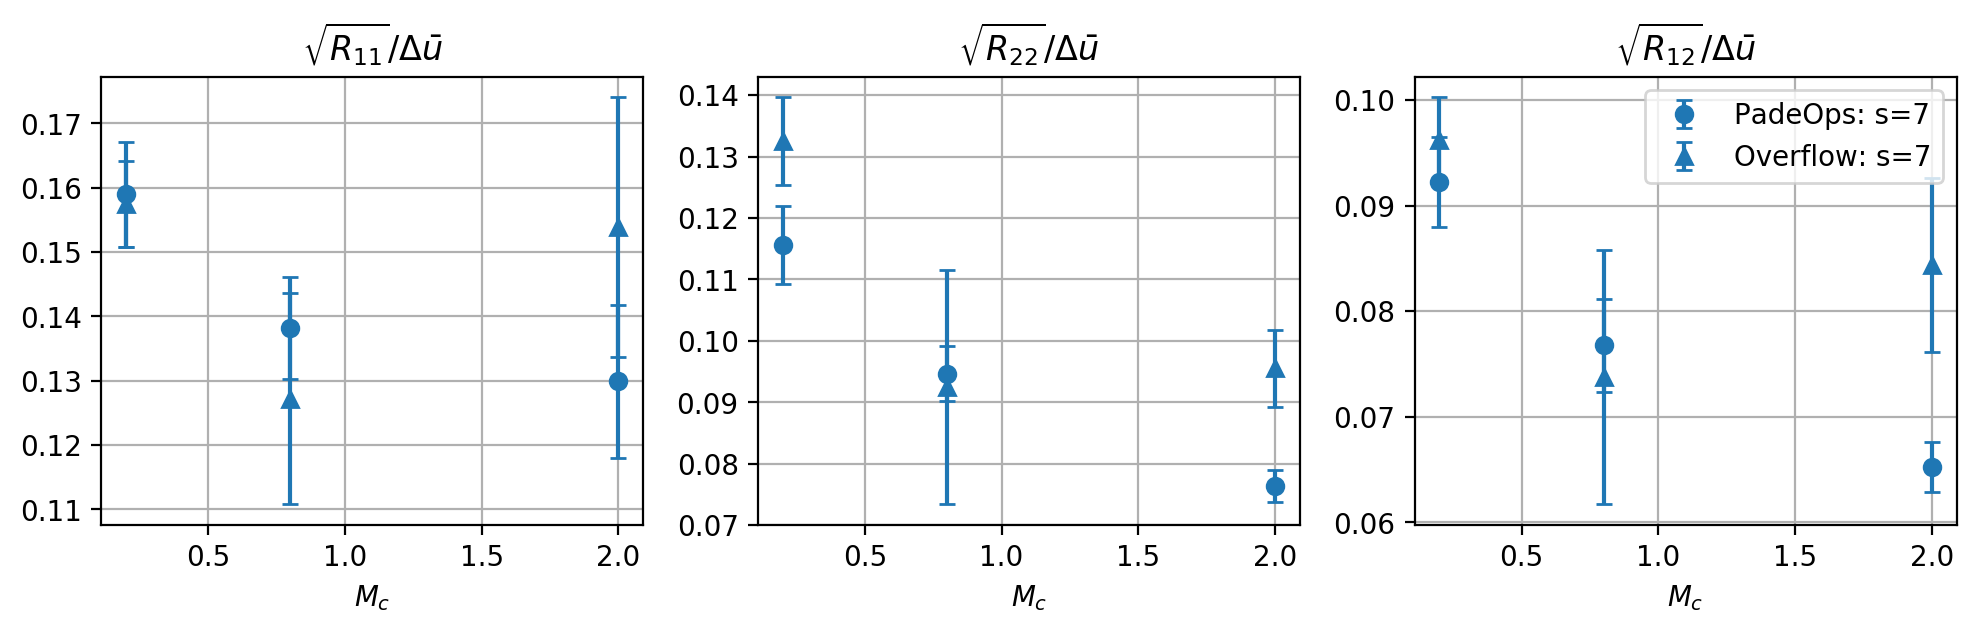

In [9]:
# Compare to Overflow

# s=1
Rij_ovf = {}
Rij_ovf[0] = {
    0.2: [0.063,0.005],
    0.4: [0.122,0.008],
    0.8: [0.227,0.005],
    1.2: [0.353,0.013],
    1.6: [0.461,0.011],
    2.0: [0.587,0.018],
}
Rij_ovf[1] = {
    0.2: [0.05355,0.001],
    0.4: [0.098,0.004],
    0.8: [0.174,0.006],
    1.2: [0.252,0.011],
    1.6: [0.249,0.016],
    2.0: [0.417,0.006],
}
Rij_ovf[2] = {
    0.2: [0.0398,0.002],
    0.4: [0.074,0.003],
    0.8: [0.130,0.005],
    1.2: [0.197,0.007],
    1.6: [0.269,0.004],
    2.0: [0.331,0.012],
}    

# s=1/7
Rij_rr_7_ovf = {}
Rij_rr_7_ovf[0] = {
    0.2: [0.06,0.003],
    0.8: [0.201,0.010],
    2.0: [0.661,0.019],
}
Rij_rr_7_ovf[1] = {
    0.2: [0.051,0.004],
    0.8: [0.147,0.013],
    2.0: [0.406,0.006],
}
Rij_rr_7_ovf[2] = {
    0.2: [0.037,0.0025],
    0.8: [0.117,0.008],
    2.0: [0.35,0.008],
}
    
# s=7
Rij_rr7_ovf = {}
Rij_rr7_ovf[0] = {
    0.2: [0.066,0.006],
    0.8: [0.206,0.013],
    2.0: [0.570,0.007],
}
Rij_rr7_ovf[1] = {
    0.2: [0.055,0.006],
    0.8: [0.149,0.014],
    2.0: [0.358,0.002],
}
Rij_rr7_ovf[2] = {
    0.2: [0.040,0.0032],
    0.8: [0.119,0.009],
    2.0: [0.325,0.002],
}
    
for i in range(3):
    for Mc, value in Rij_ovf[i].iteritems():
        du = 2*Mc
        value[0] /= du
        Rij_ovf[i][Mc] = value
    for Mc, value in Rij_rr_7_ovf[i].iteritems():
        du = 2*Mc
        value[0] /= du
        Rij_rr_7_ovf[i][Mc] = value   
    for Mc, value in Rij_rr7_ovf[i].iteritems():
        du = 2*Mc
        value[0] /= du
        Rij_rr7_ovf[i][Mc] = value
        
rr_ovf = {}
for i in range(3): rr_ovf[i] = merge_dicts(Rij_rr7_ovf[i],Rij_rr_7_ovf[i])

offset = 0.02

def make_nice(a):
    a.grid(True)
    a.set_xlabel(r'$M_c$')
    #a.set_ylim([0.05,0.18])
    plt.tight_layout()
def make_nice2():
    ax[2].legend()
    ax[0].set_title(r'$\sqrt{R_{11}}/\Delta \bar{u}$')
    ax[1].set_title(r'$\sqrt{R_{22}}/\Delta \bar{u}$')
    ax[2].set_title(r'$\sqrt{R_{12}}/\Delta \bar{u}$')
    ax[1].set_xlabel('$M_c$')

# Compare 
prefix = '/home/kmatsuno/Ovf_compare/Rij_peaks_'
DPI=200

fig,ax = plt.subplots(1,3,figsize=(10,3),dpi=DPI)
for i in range(3):
    ax[i].errorbar(Rij[i].keys(),[x[0] for x in Rij[i].values()],
         yerr=[x[1] for x in Rij[i].values()],fmt='ko',capsize=3,label='PadeOps: s=1')
    ax[i].errorbar(rr[i].keys(),[x[0] for x in rr[i].values()],
        yerr=[x[1] for x in rr[i].values()],fmt='o',capsize=3,label='PadeOps: s=7')
    make_nice(ax[i])
make_nice2()
plt.savefig(prefix+'padeops.png',dpi=DPI, bbox_inches='tight')
    
fig,ax = plt.subplots(1,3,figsize=(10,3),dpi=DPI)
for i in range(3):
    ax[i].errorbar(Rij_ovf[i].keys(),[x[0] for x in Rij_ovf[i].values()],
         yerr=[x[1] for x in Rij_ovf[i].values()],fmt='k^',capsize=3,label='Overflow: s=1')
    ax[i].errorbar(rr_ovf[i].keys(),[x[0] for x in rr_ovf[i].values()],
        yerr=[x[1] for x in rr_ovf[i].values()],fmt='^',capsize=3,label='Overflow: s=7')
    make_nice(ax[i])
make_nice2()
plt.savefig(prefix+'ovf.png',dpi=DPI, bbox_inches='tight')

fig,ax = plt.subplots(1,3,figsize=(10,3),dpi=DPI)
for i in range(3):
    ax[i].errorbar(Rij[i].keys(),[x[0] for x in Rij[i].values()],
         yerr=[x[1] for x in Rij[i].values()],fmt='ko',capsize=3,label='PadeOps: s=1')
    ax[i].errorbar(Rij_ovf[i].keys(),[x[0] for x in Rij_ovf[i].values()],
        yerr=[x[1] for x in Rij_ovf[i].values()],fmt='k^',capsize=3,label='Overflow: s=1')
    make_nice(ax[i])
make_nice2()
plt.savefig(prefix+'rr1.png',dpi=DPI, bbox_inches='tight')

fig,ax = plt.subplots(1,3,figsize=(10,3),dpi=DPI)
for i in range(3):
    ax[i].errorbar(rr[i].keys(),[x[0] for x in rr[i].values()],
         yerr=[x[1] for x in rr[i].values()],fmt='o',color='C0',capsize=3,label='PadeOps: s=7')
    ax[i].errorbar(rr_ovf[i].keys(),[x[0] for x in rr_ovf[i].values()],
        yerr=[x[1] for x in rr_ovf[i].values()],fmt='^',color='C0',capsize=3,label='Overflow: s=7')
    make_nice(ax[i])
make_nice2()
plt.savefig(prefix+'rr7.png',dpi=DPI, bbox_inches='tight')

#     ax[i].errorbar([k-offset for k in Rij_rr_7[i].keys()],[x[0] for x in Rij_rr_7[i].values()],
#         yerr=[x[1] for x in Rij_rr_7[i].values()],fmt='o',capsize=3,label='PadeOps: s=1/7')
#     ax[i].errorbar([k+offset for k in Rij_rr7[i].keys()],[x[0] for x in Rij_rr7[i].values()],
#         yerr=[x[1] for x in Rij_rr7[i].values()],fmt='o',color='C1',capsize=3,label='PadeOps: s=7')
    
        
#     ax[i].errorbar(Rij_ovf[i].keys(),[x[0] for x in Rij_ovf[i].values()],
#         yerr=[x[1] for x in Rij_ovf[i].values()],fmt='^',color='k',capsize=3,label='Overflow: s=1')
#     ax[i].errorbar([k-offset for k in Rij_rr_7_ovf[i].keys()],[x[0] for x in Rij_rr_7_ovf[i].values()],
#         yerr=[x[1] for x in Rij_rr_7_ovf[i].values()],fmt='^',color='C0',capsize=3,label='Overflow: s=1/7')
#     ax[i].errorbar([k+offset for k in Rij_rr7_ovf[i].keys()],[x[0] for x in Rij_rr7_ovf[i].values()],
#         yerr=[x[1] for x in Rij_rr7_ovf[i].values()],fmt='^',color='C1',capsize=3,label='Overflow: s=7')

    

# ax[2].legend(bbox_to_anchor=(0.6, 0.8))


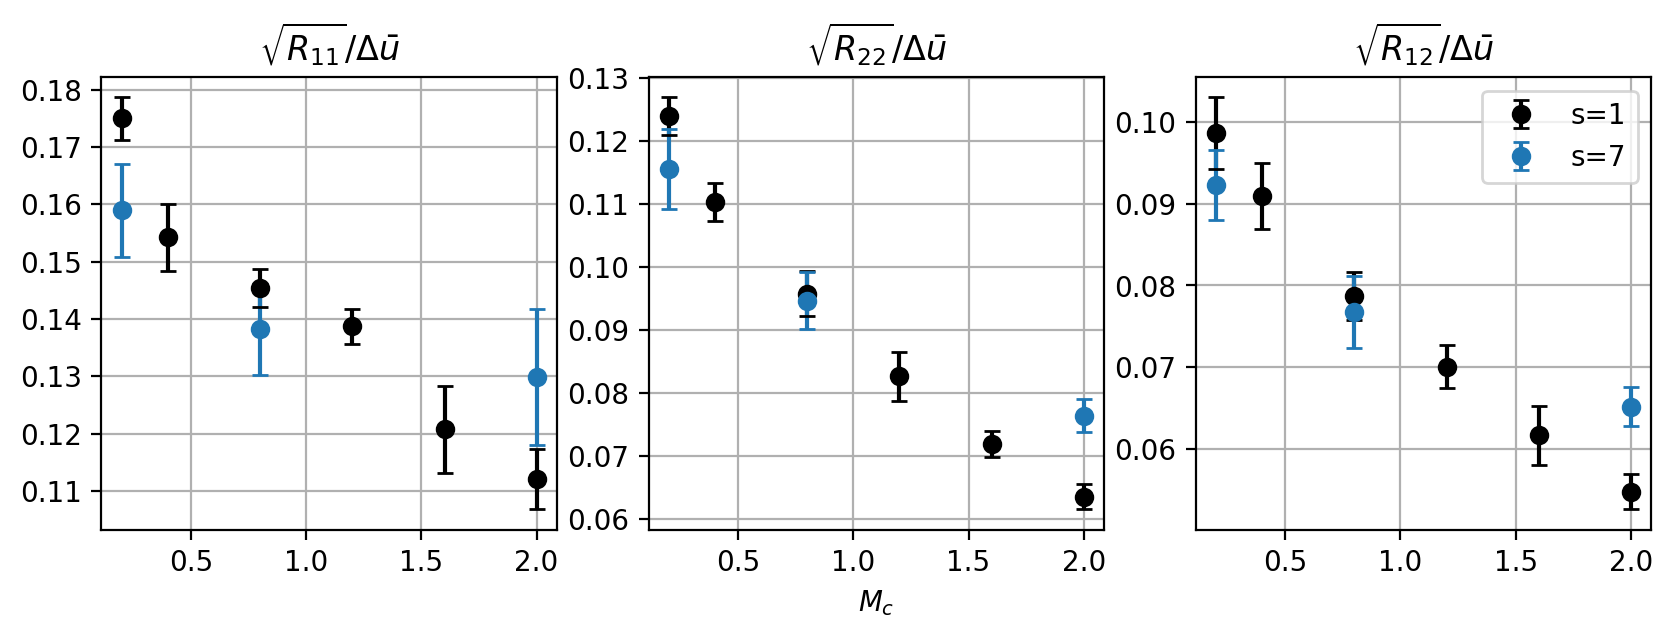

In [28]:

# s=1/7
Rij_rr_7 = {}
Rij_rr_7[0] = {
    0.2: [0.152391688239,0.00368177564802],
    0.8: [0.138154069068,0.00226542082592],
    2.0: [0.130055115342,0.00915918590473],
}
Rij_rr_7[1] = {
    0.2: [0.110326579413,0.00487057986084],
    0.8: [0.0935345692059,0.00346059609841],
    2.0: [0.0791147856457,0.00152742632348],
}
Rij_rr_7[2] = {
    0.2: [0.0898297917363,0.00145152970168],
    0.8: [0.0763047930365,0.00242587398432],
    2.0: [0.0658113811114,0.0021228247779],
}
    
# s=7
Rij_rr7 = {}
Rij_rr7[0] = {
    0.2: [0.165522024988,0.0072381018265],
    0.8: [0.138258129235,0.00757737349312],
    2.0: [0.129774750095,0.00760306887704],
}
Rij_rr7[1] = {
    0.2: [0.120985029914,0.00408902925927],
    0.8: [0.0958255139904,0.00291741041573],
    2.0: [0.0737061603818,0.002099294066],
}
Rij_rr7[2] = {
    0.2: [0.0946673285415,0.00403027220938],
    0.8: [0.0772340409351,0.00369422810456],
    2.0: [0.0645934955048,0.00104034185474],
}

def merge_dicts(old1,old2):
    new = {}
    for i in range(3):
        key = old1.keys()[i]
        v1 = old1.values()[i][0]
        v2 = old2.values()[i][0]
        e1 = old1.values()[i][1]
        e2 = old2.values()[i][1]
        err = (e1**2+e2**2)**0.5
        new[key] = [(v1+v2)/2., err]
    return new

rr = {}
for i in range(3): rr[i] = merge_dicts(Rij_rr7[i],Rij_rr_7[i])

    
# Plot for all
fig,ax = plt.subplots(1,3,figsize=(10,3),dpi=200)
offset=0.01

for i in range(3):
    ax[i].errorbar(Rij[i].keys(),[x[0] for x in Rij[i].values()],
        yerr=[x[1] for x in Rij[i].values()],fmt='ko',capsize=3,label='s=1')
    ax[i].errorbar(rr[i].keys(),[x[0] for x in rr[i].values()],
        yerr=[x[1] for x in rr[i].values()],fmt='o',capsize=3,label='s=7')
#     ax[i].errorbar([k-offset for k in Rij_rr_7[i].keys()],[x[0] for x in Rij_rr_7[i].values()],
#         yerr=[x[1] for x in Rij_rr_7[i].values()],fmt='o',capsize=3,label='PadeOps: s=1/7')
#     ax[i].errorbar([k+offset for k in Rij_rr7[i].keys()],[x[0] for x in Rij_rr7[i].values()],
#         yerr=[x[1] for x in Rij_rr7[i].values()],fmt='o',capsize=3,label='PadeOps: s=7')
    
ax[0].set_title(r'$\sqrt{R_{11}}/\Delta \bar{u}$')
ax[1].set_title(r'$\sqrt{R_{22}}/\Delta \bar{u}$')
ax[2].set_title(r'$\sqrt{R_{12}}/\Delta \bar{u}$')
ax[1].set_xlabel('$M_c$')
ax[2].legend()

for a in ax:
    a.grid(True)

plt.savefig('/home/kmatsuno/ShearLayer_img/Rij_peaks.png',dpi=DPI, bbox_inches='tight')
 